# Estimación Edad Cerebral mayores de 40 años

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:

import xgboost as xgb
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class XGBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="XGBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = xgb.XGBRegressor
        if params is None:
            self.params = {
                'objective': 'reg:squarederror',
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 3,
                'subsample': 0.8,
                'colsample_bytree': 0.8
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(50, 5000),
                'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
                'max_depth': Integer(3, 10),
                'subsample': Real(0.6, 1.0),
                'colsample_bytree': Real(0.6, 1.0)
            }

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import pandas as pd
import numpy as np
import pickle

file_name = 'dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y, preprocess=True)

In [11]:
xgb_model.X_test

,Alpha2_canon_EPP_HPC_left,Alpha2_canon_EPP_HPC_right,Alpha2_canon_EPP_PARIET_left,Alpha2_canon_EPP_PARIET_right,Alpha2_canon_EPP_OCC_left,Alpha2_canon_EPP_OCC_right,Alpha2_canon_RPD_HPC_left,Alpha2_canon_RPD_HPC_right,Alpha2_canon_RPD_CING_left,Alpha2_canon_RPD_CING_right,...,IAF_MFG_left,IAF_MFG_right,IAF_SFG_left,IAF_SFG_right,IAF_HPC_left,IAF_HPC_right,IAF_INS_left,IAF_INS_right,IAF_OCC_left,IAF_OCC_right
8,4.853793e-01,6.516293e-01,4.382182e-01,8.444543e-01,3.706420e-01,5.731781e-01,4.853793e-01,6.516293e-01,3.960974e-01,4.073218e-01,...,0.31250,0.3750,0.343750,0.375000,0.437500,0.354167,0.31250,0.40625,0.343750,0.354167
262,2.803160e-01,5.722113e-01,3.323774e-01,4.007906e-01,2.390089e-01,3.171976e-01,2.803160e-01,5.722113e-01,3.049212e-01,3.193700e-01,...,0.00000,0.0625,0.000000,0.156250,0.000000,0.000000,0.00000,0.00000,0.093750,0.093750
117,1.891931e-01,2.612739e-01,2.567393e-01,3.267168e-01,1.837482e-01,2.428723e-01,1.891931e-01,2.612739e-01,2.502629e-01,2.654999e-01,...,1.00000,0.9375,1.000000,0.812500,1.000000,0.000000,1.00000,0.84375,0.604167,0.520833
309,3.430483e-20,0.000000e+00,1.821121e-20,2.456396e-20,9.317362e-21,0.000000e+00,3.472835e-20,0.000000e+00,0.000000e+00,0.000000e+00,...,0.12500,0.1250,0.125000,0.125000,0.125000,0.125000,0.12500,0.12500,0.125000,0.125000
761,1.270549e-20,3.896352e-20,0.000000e+00,2.710505e-20,0.000000e+00,2.498747e-20,1.312901e-20,4.150461e-20,3.811648e-20,1.101143e-19,...,0.12500,0.1250,0.125000,0.125000,0.125000,0.125000,0.12500,0.12500,0.125000,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.252739e-01,2.155478e-01,2.151144e-01,2.495348e-01,1.238840e-01,1.806988e-01,1.252739e-01,2.155478e-01,1.818561e-01,1.906612e-01,...,0.00000,0.0000,0.000000,0.031250,0.041667,0.333333,0.09375,0.25000,0.572917,0.718750
247,2.018479e-01,3.445439e-01,2.567336e-01,3.108531e-01,2.130391e-01,2.534235e-01,2.018479e-01,3.445439e-01,2.483118e-01,2.619551e-01,...,0.09375,0.0625,0.000000,0.062500,0.166667,0.812500,0.00000,0.37500,0.333333,0.208333
681,7.987945e-02,1.463349e-01,3.272130e-02,4.394254e-02,4.624514e-02,7.100331e-02,7.987945e-02,1.463349e-01,4.097761e-02,5.397353e-02,...,0.00000,0.0000,0.000000,0.000000,1.000000,0.875000,0.40625,0.00000,0.333333,0.510417
41,2.344134e-01,5.091969e-01,3.171806e-01,3.947367e-01,1.843550e-01,2.681719e-01,2.344134e-01,5.091969e-01,2.243868e-01,2.431889e-01,...,0.00000,0.3125,0.203125,0.140625,0.062500,0.270833,0.28125,0.34375,0.145833,0.187500


In [5]:
df_filtrado

,Unnamed: 0,Age,Alpha2_canon_EPP_HPC_left,Alpha2_canon_EPP_HPC_right,Alpha2_canon_EPP_PARIET_left,Alpha2_canon_EPP_PARIET_right,Alpha2_canon_EPP_OCC_left,Alpha2_canon_EPP_OCC_right,Alpha2_canon_RPD_HPC_left,Alpha2_canon_RPD_HPC_right,...,IAF_MFG_left,IAF_MFG_right,IAF_SFG_left,IAF_SFG_right,IAF_HPC_left,IAF_HPC_right,IAF_INS_left,IAF_INS_right,IAF_OCC_left,IAF_OCC_right
0,3,57.0,0.014647,0.013471,0.013073,0.013822,0.021933,0.017799,0.002092,0.001924,...,11.375,11.625,11.6875,11.6875,11.500000,11.666667,11.500,11.625,11.375000,11.500000
1,12,42.0,0.021705,0.014934,0.021138,0.019552,0.020463,0.024079,0.003101,0.002133,...,10.500,10.500,10.5625,10.5000,10.666667,10.500000,10.500,10.500,10.500000,10.500000
2,16,41.0,0.011276,0.008766,0.008108,0.013774,0.012341,0.011588,0.001611,0.001252,...,11.625,11.875,11.7500,11.9375,11.583333,12.000000,11.625,12.000,11.750000,11.708333
3,27,44.0,0.023957,0.017935,0.016236,0.018895,0.032697,0.021492,0.003422,0.002562,...,10.375,10.375,10.3750,10.5000,10.250000,10.416667,10.375,10.500,10.333333,10.375000
4,33,42.0,0.007764,0.005040,0.010052,0.008514,0.010440,0.010819,0.001109,0.000720,...,10.250,10.250,10.2500,10.3125,10.250000,9.666667,10.250,10.250,10.250000,10.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,1544,48.0,0.007819,0.008175,0.007330,0.009786,0.009443,0.009162,0.001117,0.001168,...,9.875,8.250,8.3125,9.6250,9.583333,11.750000,9.500,10.750,9.750000,9.833333
805,1546,57.0,0.006954,0.006618,0.005141,0.005685,0.007440,0.006692,0.000993,0.000945,...,8.000,10.000,8.0000,8.5625,8.000000,12.000000,8.000,10.000,8.000000,9.041667
806,1548,57.0,0.010784,0.010763,0.007001,0.007620,0.008773,0.008320,0.001541,0.001538,...,9.125,8.500,9.2500,9.0625,8.666667,8.583333,9.000,9.000,8.958333,8.000000
807,1549,69.0,0.011437,0.011171,0.009038,0.011523,0.009255,0.009590,0.001634,0.001596,...,8.000,8.000,9.0625,9.0000,9.333333,8.583333,8.500,8.625,9.916667,9.708333


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


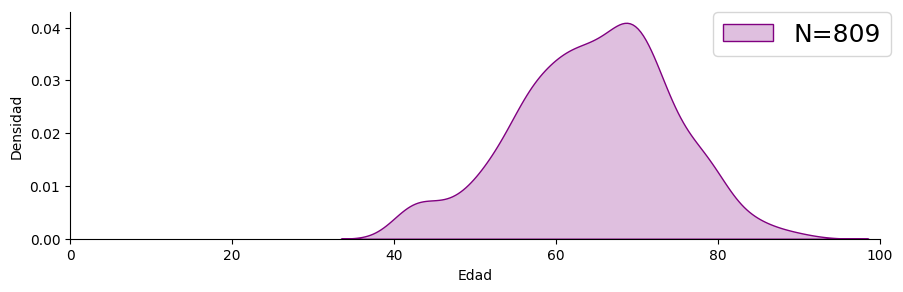

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)

# Contar el número de personas en el DataFrame filtrado
num_personas = df_filtrado.shape[0]

# Crear el FacetGrid
facet = sns.FacetGrid(df_filtrado, aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True, color='purple')  # Cambia el color aquí
facet.set(xlim=(df['Age'].min(), df['Age'].max()))

legend = facet.fig.legend(labels=[f'N={num_personas}'], loc='upper right', prop={'size': 18})

# Añadir la leyenda con el número de personas
#facet.fig.legend(labels=[f'N={num_personas}'], loc='upper right')

# Cambiar los nombres de los ejes
facet.set_axis_labels("Edad", "Densidad")

# Establecer los límites del eje x y mostrar el gráfico
plt.xlim(0, 100)
plt.show()


c:\Users\felip\Documents\Brain_Age_\brain_age_env_2\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


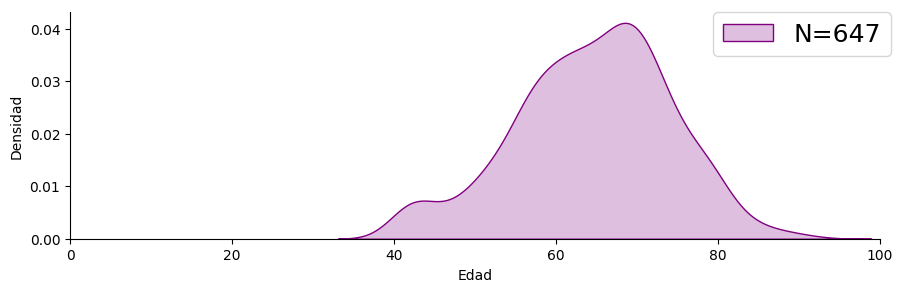

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que xgb_model.y_train es una Serie de pandas con las edades
y_train_df = xgb_model.y_train.reset_index()

# Contar el número de personas en el DataFrame
num_personas = y_train_df.shape[0]

# Crear el FacetGrid
facet = sns.FacetGrid(y_train_df, aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True, color='purple')  # Cambia el color aquí
facet.set(xlim=(df['Age'].min(), df['Age'].max()))

# Añadir la leyenda con el número de personas
legend = facet.fig.legend(labels=[f'N={num_personas}'], loc='upper right', prop={'size': 18})

# Cambiar los nombres de los ejes
facet.set_axis_labels("Edad", "Densidad")

# Establecer los límites del eje x y mostrar el gráfico
plt.xlim(0, 100)
plt.show()


c:\Users\felip\Documents\Brain_Age_\brain_age_env_2\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


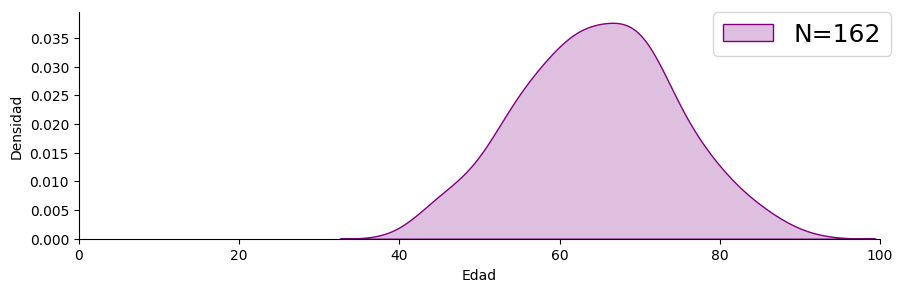

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que xgb_model.y_train es una Serie de pandas con las edades
y_train_df = xgb_model.y_test.reset_index()

# Contar el número de personas en el DataFrame
num_personas = y_train_df.shape[0]

# Crear el FacetGrid
facet = sns.FacetGrid(y_train_df, aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True, color='purple')  # Cambia el color aquí
facet.set(xlim=(df['Age'].min(), df['Age'].max()))

# Añadir la leyenda con el número de personas
legend = facet.fig.legend(labels=[f'N={num_personas}'], loc='upper right', prop={'size': 18})

# Cambiar los nombres de los ejes
facet.set_axis_labels("Edad", "Densidad")

# Establecer los límites del eje x y mostrar el gráfico
plt.xlim(0, 100)
plt.show()


# Busqueda hiperparametros

In [ ]:
opt_xgb_40A, best_params_xgb_40A = xgb_model.search_best_model(n_iter_=400)


In [ ]:
with open('C:/Users/felip/Documents/opt_XGB_model_40A.pickle', 'wb') as file:
        pickle.dump(opt_xgb_40A, file)

In [7]:
with open(f'{path}Opt_Model/opt_XGB_model_40A.pickle', 'rb') as file:
    opt_xgb_40A= pickle.load(file)

C:\Users/felipe/Documents/Brain\base_regressor.py:309: RuntimeWarning: overflow encountered in exp
  return C * (1-np.exp(-t / tau)) + b
C:\Users/felipe/Documents/Brain\base_regressor.py:252: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(self.exponential_decay, t, y_true, p0=[C_true, tau_true, b_true])


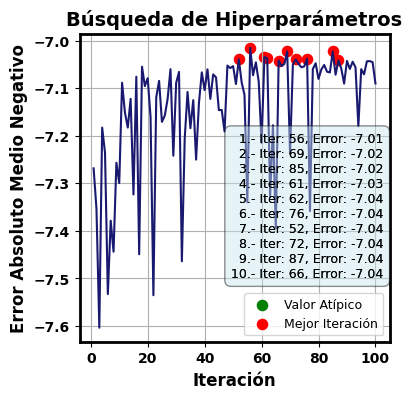

Top 1: Iteración 56, Error -7.014634330670039
Top 2: Iteración 69, Error -7.0224468789345185
Top 3: Iteración 85, Error -7.022498437563579
Top 4: Iteración 61, Error -7.034205054472655
Top 5: Iteración 62, Error -7.03698419411977
Top 6: Iteración 76, Error -7.037619199875072
Top 7: Iteración 52, Error -7.03915003709304
Top 8: Iteración 72, Error -7.039282055053955
Top 9: Iteración 87, Error -7.041247010934048
Top 10: Iteración 66, Error -7.04154234351256


In [8]:
xgb_model.plot_search_best_model(opt_xgb_40A, linewidth=1.5, color='midnightblue', num_max=100)


In [7]:
results_opt = pd.DataFrame(opt_xgb_40A.cv_results_)

In [9]:
results_opt.to_csv('results_opt.txt', sep=',', index=False)


In [59]:
results_opt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,13.470049,0.132350,0.011471,0.002806,0.764042,0.088469,10,1613,0.868059,"{'colsample_bytree': 0.7640415835413256, 'lear...",...,-6.903637,-7.415132,-7.701831,-6.928517,-7.703222,-5.915066,-7.396270,-7.268362,0.667064,383
1,8.000245,0.298025,0.009536,0.003049,0.934955,0.141,5,4759,0.945651,"{'colsample_bytree': 0.9349553422213137, 'lear...",...,-6.010859,-7.690443,-8.462771,-7.453533,-7.258673,-6.572971,-7.528845,-7.353287,0.757502,390
2,4.739296,0.107447,0.009512,0.003910,0.777933,0.156778,4,2195,0.675182,"{'colsample_bytree': 0.7779330049204607, 'lear...",...,-6.924513,-7.960693,-8.648183,-7.217623,-8.587428,-6.670283,-7.221414,-7.603637,0.687271,400
3,39.341640,0.208896,0.015349,0.004989,0.924958,0.016734,7,4024,0.809221,"{'colsample_bytree': 0.9249583953429453, 'lear...",...,-6.310882,-7.631889,-8.037432,-6.920559,-7.583823,-6.397883,-7.150523,-7.182633,0.680041,370
4,19.866152,0.127714,0.010221,0.004973,0.919821,0.037144,7,3593,0.961541,"{'colsample_bytree': 0.9198213766428692, 'lear...",...,-6.297372,-7.554288,-7.983261,-6.826730,-7.691835,-6.439734,-6.961963,-7.235468,0.730971,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,68.090420,0.611388,0.014456,0.006331,0.6,0.013582,10,4575,1.0,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",...,-6.438563,-7.532566,-7.920932,-6.452479,-7.334801,-5.871240,-7.021159,-7.053250,0.803766,225
396,67.703866,0.620159,0.013853,0.004294,0.6,0.013639,10,4580,1.0,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",...,-6.437071,-7.515127,-7.869953,-6.435419,-7.443210,-5.928849,-6.992194,-7.049083,0.777566,187
397,67.357091,0.394692,0.013339,0.004271,0.6,0.01366,10,4583,1.0,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",...,-6.406694,-7.447006,-7.890456,-6.418606,-7.359698,-5.895690,-7.027927,-7.037578,0.774778,65
398,67.768893,0.693740,0.013675,0.005551,0.6,0.0136,10,4580,1.0,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",...,-6.419409,-7.512564,-7.888389,-6.441898,-7.437458,-5.922192,-7.099069,-7.064883,0.784590,293


In [9]:
best_params_xgb = xgb_model.best_hyper(opt_xgb_40A, num_max=100, num_best=40)

In [10]:
best_params_xgb

[{'colsample_bytree': 0.6,
  'learning_rate': 0.031011543328829893,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03371374196724646,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03092947827664299,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.033676334284894124,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.033342393223245836,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03131428589297841,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.047263658704671266,
  'max_depth': 9,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03373686268743549,
  'max_depth': 10,
  'n_est

In [43]:
xgb_model.fit_params_train = {                
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": True
            }
xgb_model.model_params_train = {"early_stopping_rounds": 10,
                                "eval_metric": "mae",}

In [19]:
xgb_model.fit_params_train = {}

In [11]:
results, best_model_results, best_model = xgb_model.trainer(params_=best_params_xgb[0])

In [33]:
#with open(f'{path}Opt_Model/BestModel_XGB_all_features_40A.pickle', 'wb') as file:
#    pickle.dump(best_model, file)
#with open(f'{path}Opt_Model/results_XGB_model_all_features_40A.pickle', 'wb') as file:
#    pickle.dump(results, file)

In [69]:
with open(f'{path}Opt_Model/BestModel_XGB_all_features_40A.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model/results_XGB_model_all_features_40A.pickle', 'rb') as file:
    results =  pickle.load(file)

In [70]:
xgb_model.model=model

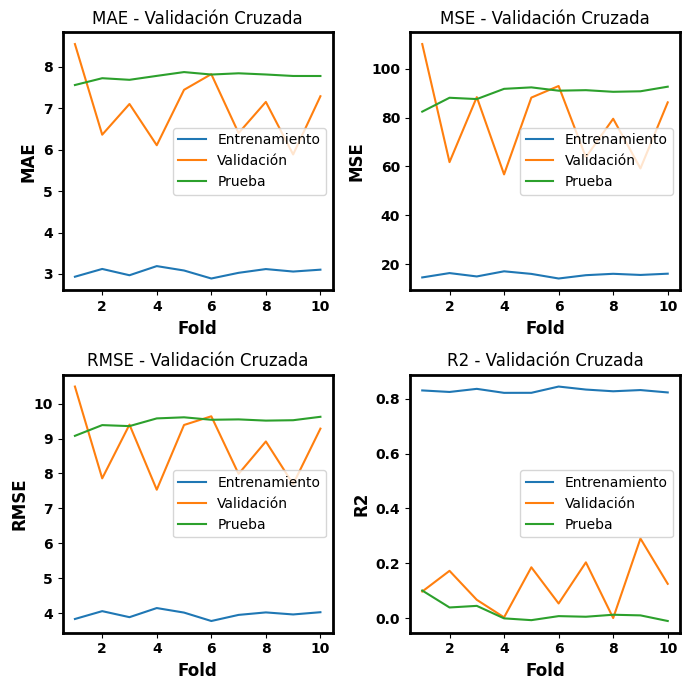

In [12]:
xgb_model.plot_metricas_evaluacion(results)

In [13]:
y_pred=xgb_model.predicter(xgb_model.X_test)

In [12]:
y_test_array = xgb_model.y_test.to_numpy()

In [14]:
with open('C:/Users/felip/Documents/edad_real_40A_pandas.pickle', 'wb') as file:
        pickle.dump(xgb_model.y_test, file)
with open('C:/Users/felip/Documents/edad_real_40A_array.pickle', 'wb') as file:
        pickle.dump(y_test_array, file)
with open('C:/Users/felip/Documents/edad_predicha_40A_array.pickle', 'wb') as file:
        pickle.dump(y_pred, file)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.865
Date:                Wed, 21 Aug 2024   Prob (F-statistic):             0.0166
Time:                        19:55:13   Log-Likelihood:                -421.25
No. Observations:                 162   AIC:                             846.5
Df Residuals:                     160   BIC:                             852.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.4753      1.760     34.355      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:356: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


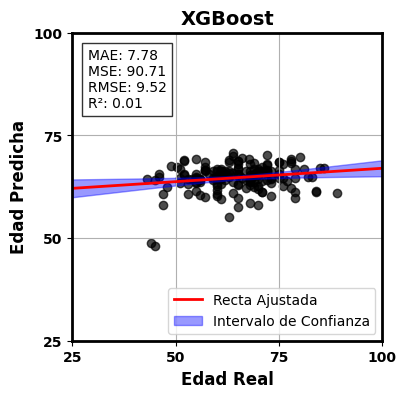

Error medio absoluto: 7.782425947150086
Error cuadrático medio: 90.70574397407314
Raíz del error cuadrático medio: 9.523956319412282
Coeficiente de determinación (R²): 0.01022368375752769


In [14]:
xgb_model.plot_regresion(y=y_pred,x= xgb_model.y_test, x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [15]:
y_pred_train=xgb_model.predicter(xgb_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     5254.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):          3.41e-312
Time:                        19:55:21   Log-Likelihood:                -1354.3
No. Observations:                 647   AIC:                             2713.
Df Residuals:                     645   BIC:                             2722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9370      0.524     51.422      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:356: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


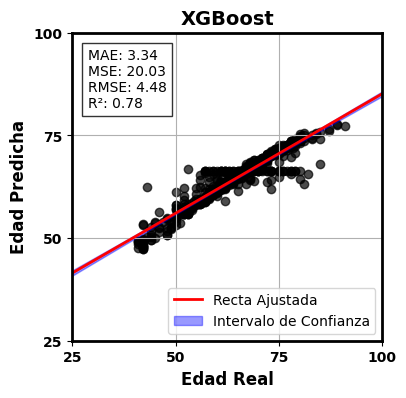

Error medio absoluto: 3.33833590492276
Error cuadrático medio: 20.027858894637827
Raíz del error cuadrático medio: 4.475249590205872
Coeficiente de determinación (R²): 0.7837343256376371


In [16]:
xgb_model.plot_regresion(y=y_pred_train,x= xgb_model.y_train, x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [17]:
residuals = xgb_model.predicter(xgb_model.X_train)-xgb_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     2708.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):          4.50e-233
Time:                        19:55:32   Log-Likelihood:                -1354.3
No. Observations:                 647   AIC:                             2713.
Df Residuals:                     645   BIC:                             2722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9370      0.524     51.422      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:356: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


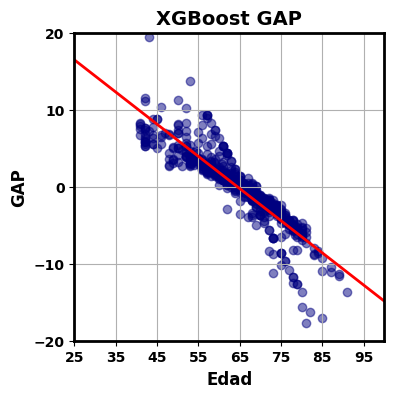

Error medio absoluto: 64.5452222435945
Error cuadrático medio: 4356.127098498513
Raíz del error cuadrático medio: 66.00096286038949
Coeficiente de determinación (R²): -46.03851617494533


In [18]:
xgb_model.plot_regresion(y=residuals,x=xgb_model.y_train,line_ideal=False,confidence_interval=False,x_min_limit=25,x_max_limit=100,legend=False,legend_metrics=False, title='XGBoost GAP', xlabel='Edad', ylabel='GAP')

In [19]:
y_pred_corrected=xgb_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     322.2
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           3.58e-40
Time:                        19:55:38   Log-Likelihood:                -421.25
No. Observations:                 162   AIC:                             846.5
Df Residuals:                     160   BIC:                             852.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5383      1.760     19.053      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:356: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


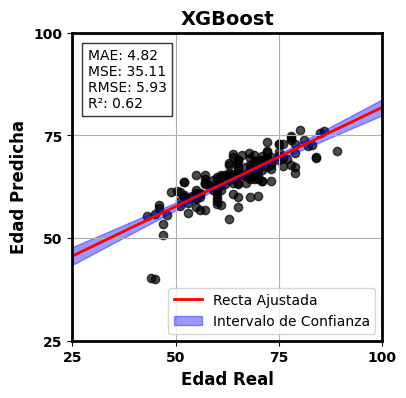

Error medio absoluto: 4.818457279246167
Error cuadrático medio: 35.11343207149927
Raíz del error cuadrático medio: 5.925658787974487
Coeficiente de determinación (R²): 0.6168440726720366


In [20]:
xgb_model.plot_regresion(y=y_pred_corrected,x= xgb_model.y_test, x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

# SHAP

In [80]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=xgb_model.X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
High_subj_spec_EPP_HPC_left: 82.58583068847656
IAF_OCC_left: 82.17539978027344
Low_subj_spec_EPP_HPC_left: 59.218833923339844
Low_subj_spec_EPP_OCC_right: 47.51367950439453
High_subj_spec_EPP_CING_right: 47.17716598510742
Low_subj_spec_RPD_PARIET_right: 32.97649002075195
Alpha2_canon_EPP_OCC_right: 32.610260009765625
Low_subj_spec_EPP_OCC_left: 29.423446655273438
Alpha2_canon_EPP_OCC_left: 29.372909545898438
Alpha2_canon_EPP_HPC_right: 28.222726821899414
IAF_INS_right: 28.039194107055664
Low_subj_spec_EPP_PARIET_right: 26.420154571533203
Low_subj_spec_RPD_HPC_right: 25.233612060546875
High_subj_spec_RPD_HPC_left: 24.458053588867188
High_subj_spec_EPP_PARIET_right: 24.441513061523438
Alpha2_canon_EPP_HPC_left: 22.793256759643555
High_subj_spec_RPD_CING_right: 21.33511734008789
High_subj_spec_EPP_OCC_left: 21.135465621948242
TF_SFG_left: 20.84241485595703
Alpha2_canon_RPD_CING_right: 18.944841384887695
Low_subj_spec_RPD_CING_

In [83]:
with open(f'{path}Opt_Model/shap_values_xgb_40A.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model/shap_summary_sorted_xgb_40A.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

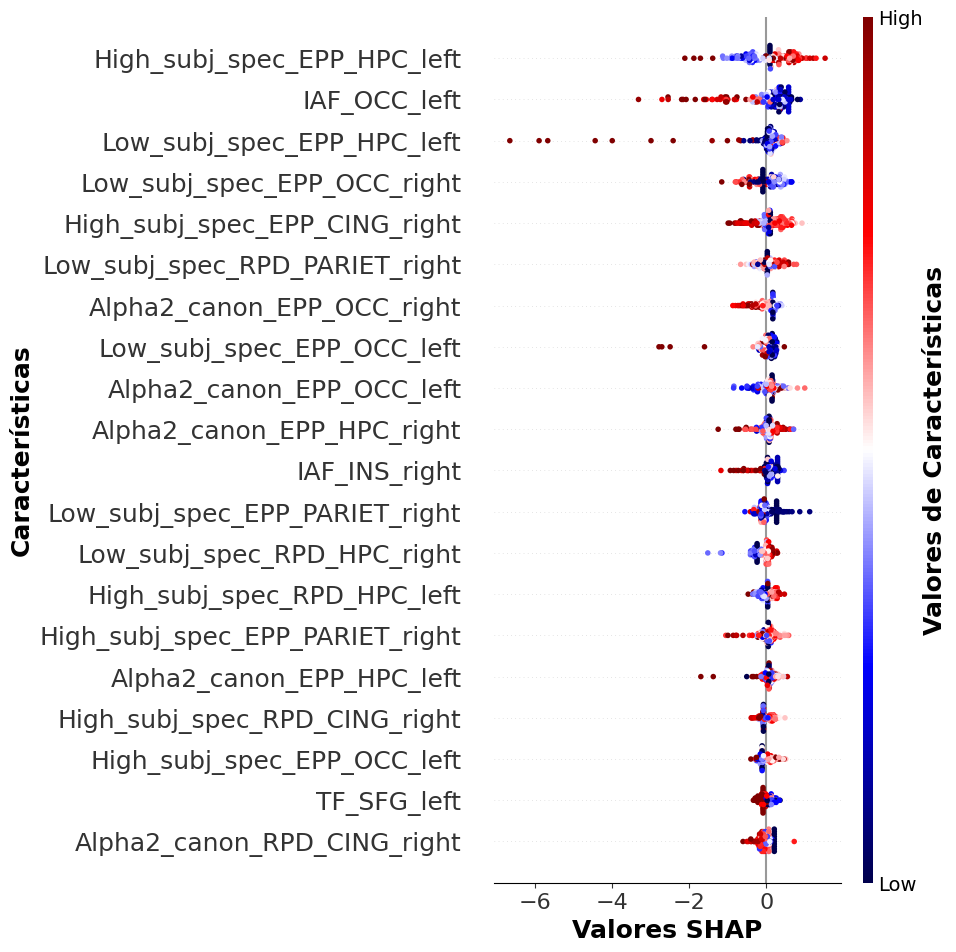

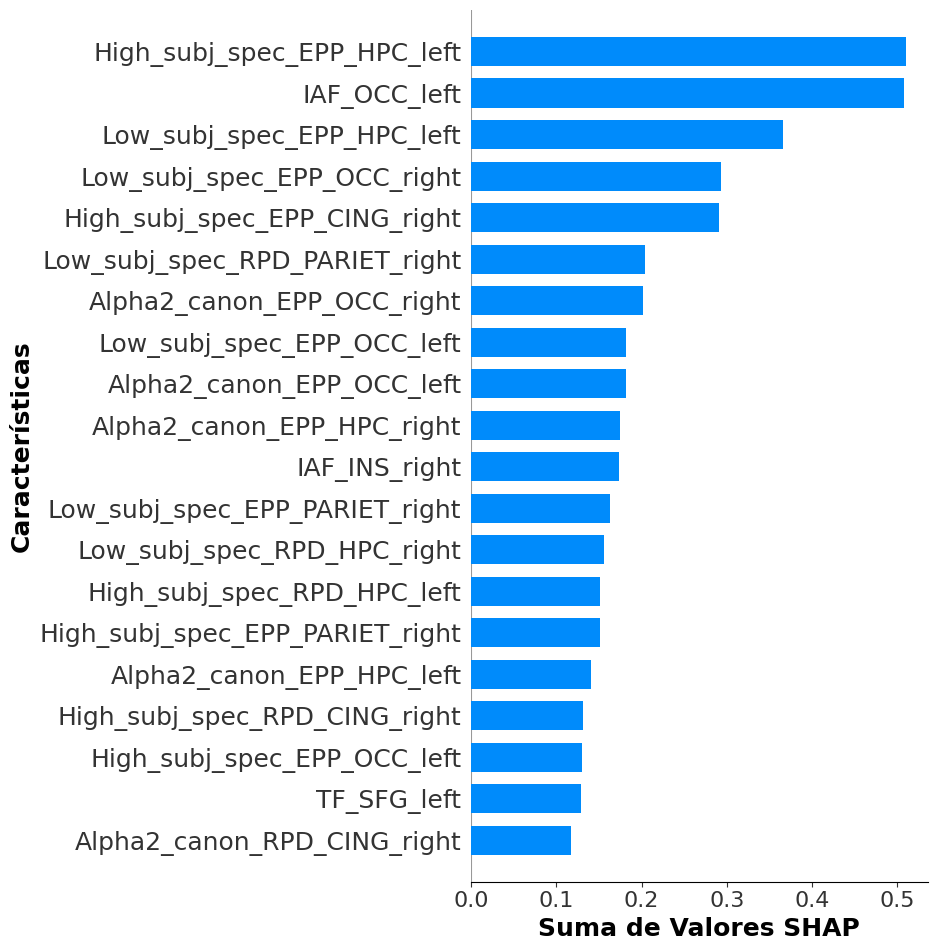

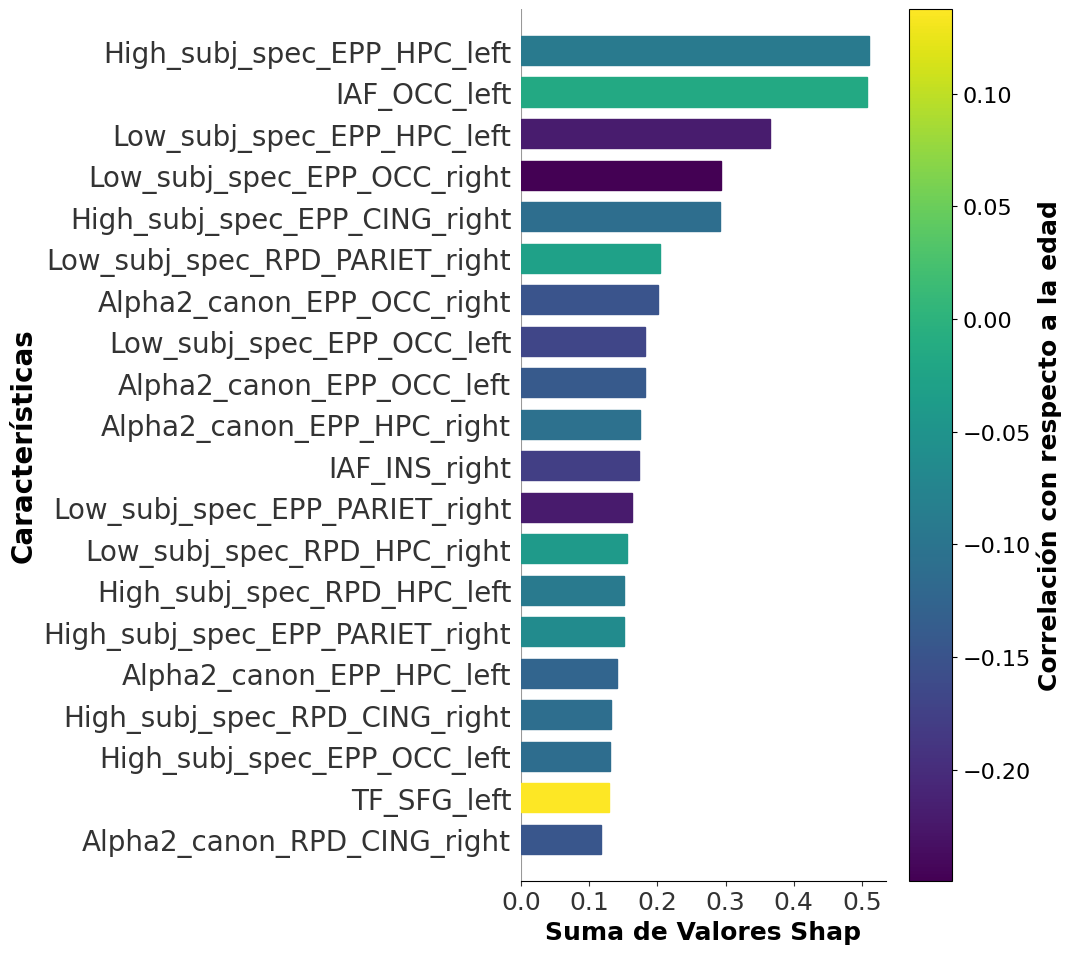

In [81]:
xgb_model.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test)

In [33]:
shap_por_region_sorted, resultado_normalizado_sorted=xgb_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

HPC_left: 1.000000
OCC_left: 0.766073
CING_right: 0.573165
OCC_right: 0.462021
PARIET_right: 0.453979
HPC_right: 0.299284
INS_right: 0.152215
SFG_left: 0.108678


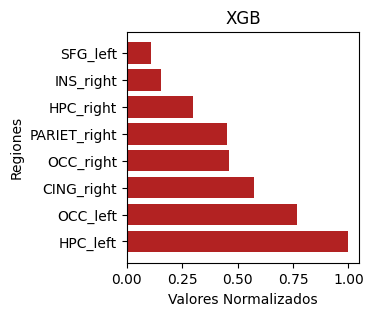

In [34]:
xgb_model.plot_normalized_values(resultado_normalizado_sorted, color='firebrick', name_set='XGB',x_size=3,y_size=3)

c:\Users\felip\Documents\Brain_Age_\brain_age_env_2\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


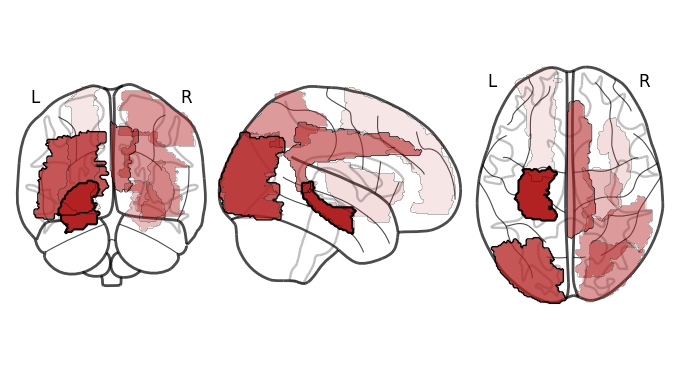

In [36]:
base_path = 'C:/Users/felip/Documents/brain_age_/cerebritos/'

xgb_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='firebrick')

# Top 20 Features

In [ ]:
#with open(f'{path}Opt_Model/shap_summary_sorted_xgb.pickle', 'rb') as file:
#    shap_summary_sorted= pickle.load(file)

In [35]:
top_20_features = [feature[0] for feature in shap_summary_sorted[:20]]

In [36]:
X_train = xgb_model.X_train[top_20_features]
X_test = xgb_model.X_test[top_20_features]  

In [37]:
opt_model_top20, parametros_top20 = xgb_model.search_best_model(X=X_train, n_iter_=50, n_jobs_=-2)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [38]:
#with open(f'{path}Opt_Model/opt_XGB_model_40A_top20.pickle', 'wb') as file:
#    pickle.dump(opt_model_top20, file)

C:\Users/felipe/Documents/Brain\base_regressor.py:254: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(self.exponential_decay, t, y_true, p0=[C_true, tau_true, b_true])


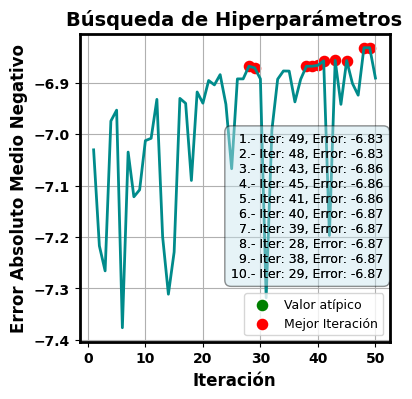

Top 1: Iteración 49, Error -6.831900166487083
Top 2: Iteración 48, Error -6.831900195830907
Top 3: Iteración 43, Error -6.856505193740894
Top 4: Iteración 45, Error -6.856857624848684
Top 5: Iteración 41, Error -6.8574269590928
Top 6: Iteración 40, Error -6.866131602892509
Top 7: Iteración 39, Error -6.867924723258386
Top 8: Iteración 28, Error -6.867924865484238
Top 9: Iteración 38, Error -6.867925187624418
Top 10: Iteración 29, Error -6.8710429588342326


In [39]:
xgb_model.plot_search_best_model(opt_model_top20, color='darkcyan', linewidth=2)

In [40]:
best_params_xgb_top20 = xgb_model.best_hyper(opt_model_top20)

In [41]:
best_params_xgb_top20

[{'colsample_bytree': 0.7320908810467246,
  'learning_rate': 0.01,
  'max_depth': 8,
  'n_estimators': 3851,
  'subsample': 1.0},
 {'colsample_bytree': 0.7080586946618046,
  'learning_rate': 0.01,
  'max_depth': 8,
  'n_estimators': 3858,
  'subsample': 1.0},
 {'colsample_bytree': 0.6925259121077493,
  'learning_rate': 0.01,
  'max_depth': 9,
  'n_estimators': 3447,
  'subsample': 0.8310674335561613},
 {'colsample_bytree': 0.7508905477516925,
  'learning_rate': 0.01,
  'max_depth': 9,
  'n_estimators': 3323,
  'subsample': 0.9417009786923315},
 {'colsample_bytree': 0.6830345910255422,
  'learning_rate': 0.01,
  'max_depth': 9,
  'n_estimators': 3691,
  'subsample': 0.9138787750725501},
 {'colsample_bytree': 0.6686051582675457,
  'learning_rate': 0.01,
  'max_depth': 8,
  'n_estimators': 3800,
  'subsample': 0.9366940806331808},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 9,
  'n_estimators': 4052,
  'subsample': 1.0},
 {'colsample_bytree': 0.6221629205884884,
  '

In [54]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 30,
                "eval_metric": "mae",
                "eval_set": [(X_test, xgb_model.y_test)],
                "verbose": True
            }

In [ ]:
results, best_model_results, best_model = xgb_model.trainer(X_train=X_train,X_test=X_test,params_=best_params_xgb_top20[0])

In [66]:
#with open(f'{path}Opt_Model/BestModel_XGB_all_features_40A_top20.pickle', 'wb') as file:
#    pickle.dump(best_model, file)
#with open(f'{path}Opt_Model/results_XGB_model_all_features_40A_top20.pickle', 'wb') as file:
#    pickle.dump(results, file)

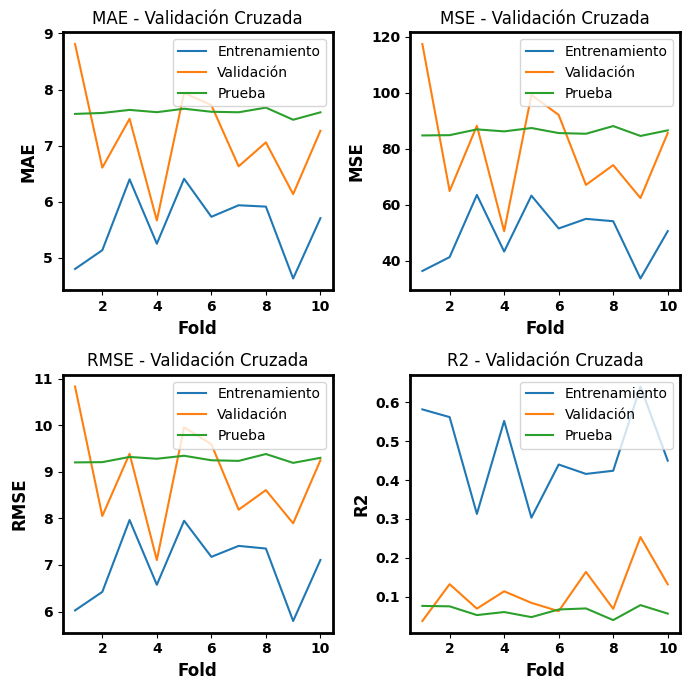

In [56]:
xgb_model.plot_metricas_evaluacion(results)

In [57]:
y_pred_top20=xgb_model.predicter(X_test=X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     10.61
Date:                Fri, 16 Aug 2024   Prob (F-statistic):            0.00138
Time:                        09:48:51   Log-Likelihood:                -393.16
No. Observations:                 162   AIC:                             790.3
Df Residuals:                     160   BIC:                             796.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0164      1.480     40.550      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


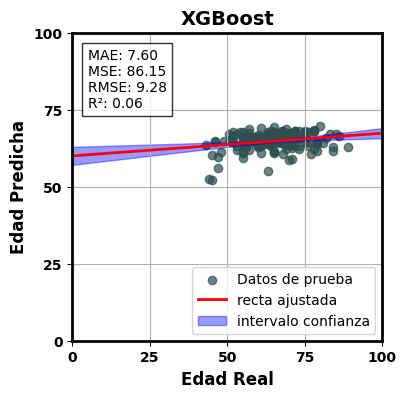

Error medio absoluto: 7.596265894885908
Error cuadrático medio: 86.14737627951723
Raíz del error cuadrático medio: 9.281561090652652
Coeficiente de determinación (R²): 0.05996435272867762


In [58]:
xgb_model.plot_regresion(y=y_pred_top20,x= xgb_model.y_test,label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='XGBoost',line_ideal=False,confidence_interval=True, color='darkslategray',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [59]:
y_pred_train=xgb_model.predicter(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     2347.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          4.24e-217
Time:                        09:48:56   Log-Likelihood:                -1255.6
No. Observations:                 647   AIC:                             2515.
Df Residuals:                     645   BIC:                             2524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1794      0.450     96.021      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


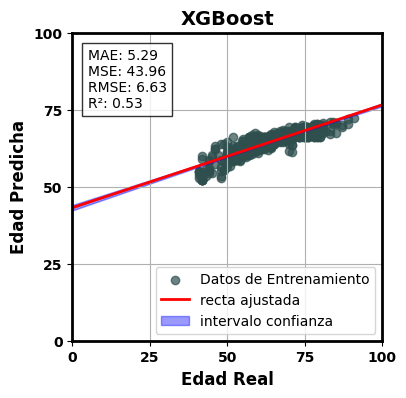

Error medio absoluto: 5.292369734436382
Error cuadrático medio: 43.96143503318235
Raíz del error cuadrático medio: 6.6303419997148225
Coeficiente de determinación (R²): 0.5252937698730321


In [60]:
xgb_model.plot_regresion(y=y_pred_train,x= xgb_model.y_train, label_='Datos de Entrenamiento',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='darkslategray', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [61]:
residuals = xgb_model.predicter(X_train)-xgb_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     9334.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:49:00   Log-Likelihood:                -1255.6
No. Observations:                 647   AIC:                             2515.
Df Residuals:                     645   BIC:                             2524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1794      0.450     96.021      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


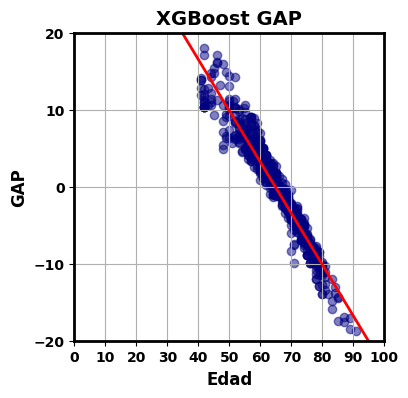

Error medio absoluto: 64.30935056156747
Error cuadrático medio: 4395.575153622206
Raíz del error cuadrático medio: 66.29913388289629
Coeficiente de determinación (R²): -46.464485834931956


In [62]:
xgb_model.plot_regresion(y=residuals,x=xgb_model.y_train,line_ideal=False,confidence_interval=False,x_min_limit=0,x_max_limit=100,legend=False,legend_metrics=False, title='XGBoost GAP', xlabel='Edad', ylabel='GAP')

In [63]:
y_pred_corrected=xgb_model.predicter_corrected(X_test=X_test, X_train=X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1069.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           1.01e-72
Time:                        09:49:04   Log-Likelihood:                -393.16
No. Observations:                 162   AIC:                             790.3
Df Residuals:                     160   BIC:                             796.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8370      1.480     11.376      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


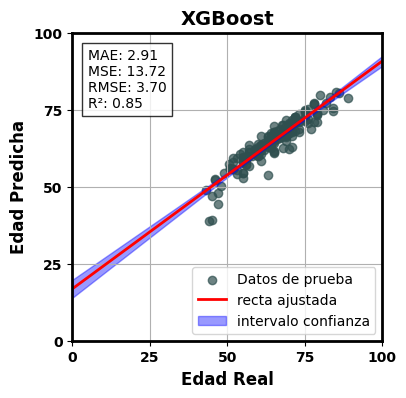

Error medio absoluto: 2.9127496386304035
Error cuadrático medio: 13.716289351594545
Raíz del error cuadrático medio: 3.7035509111654648
Coeficiente de determinación (R²): 0.85032857069319


In [64]:
xgb_model.plot_regresion(y=y_pred_corrected,x= xgb_model.y_test,label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='darkslategray', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False, xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [65]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
IAF_OCC_left: 91.62885284423828
High_subj_spec_EPP_CING_right: 56.39742660522461
High_subj_spec_EPP_HPC_left: 54.38304138183594
Low_subj_spec_EPP_HPC_left: 50.66886901855469
High_subj_spec_EPP_PARIET_right: 49.557395935058594
Alpha2_canon_EPP_OCC_left: 47.211910247802734
Alpha2_canon_EPP_OCC_right: 43.916622161865234
Low_subj_spec_EPP_OCC_left: 38.12214660644531
IAF_INS_right: 36.07571029663086
Low_subj_spec_RPD_HPC_right: 29.573238372802734
Low_subj_spec_EPP_OCC_right: 29.26354217529297
Alpha2_canon_RPD_CING_right: 27.84232521057129
Alpha2_canon_EPP_HPC_right: 27.602964401245117
Alpha2_canon_EPP_HPC_left: 25.95772361755371
Low_subj_spec_RPD_PARIET_right: 25.908721923828125
High_subj_spec_EPP_OCC_left: 24.914243698120117
High_subj_spec_RPD_CING_right: 23.894371032714844
TF_SFG_left: 19.298513412475586
Low_subj_spec_EPP_PARIET_right: 15.507944107055664
High_subj_spec_RPD_HPC_left: 11.385085105895996


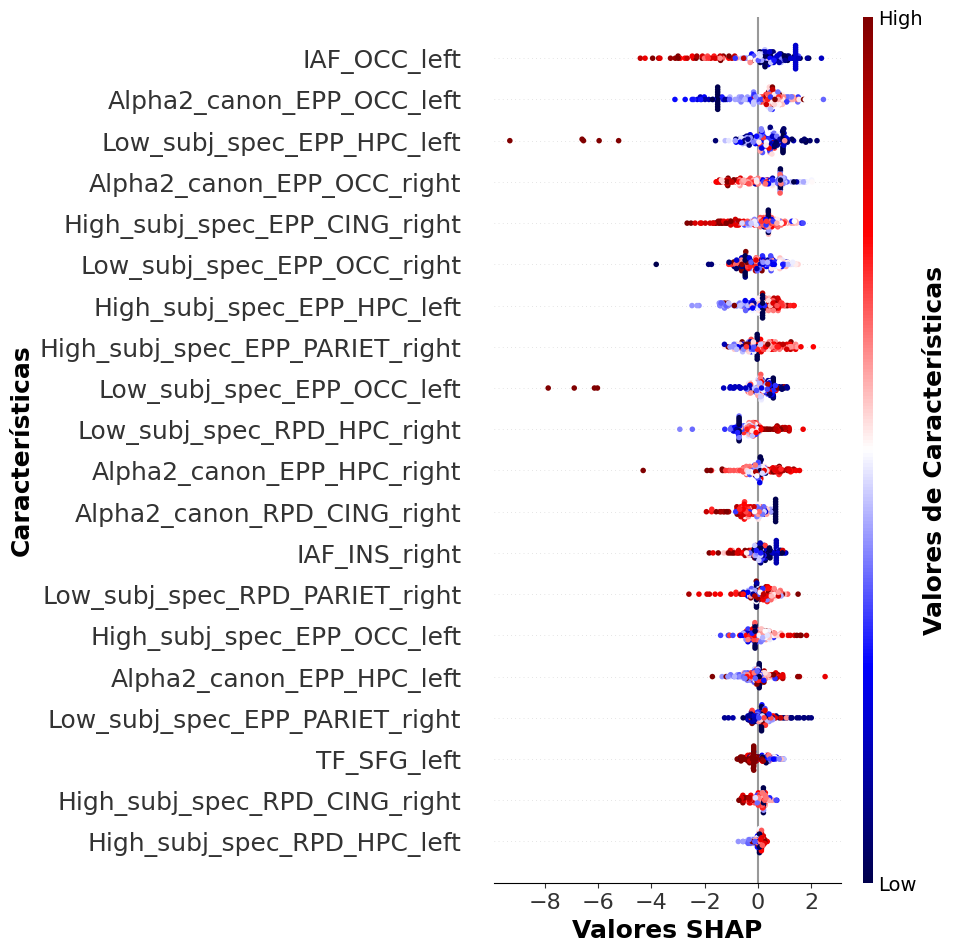

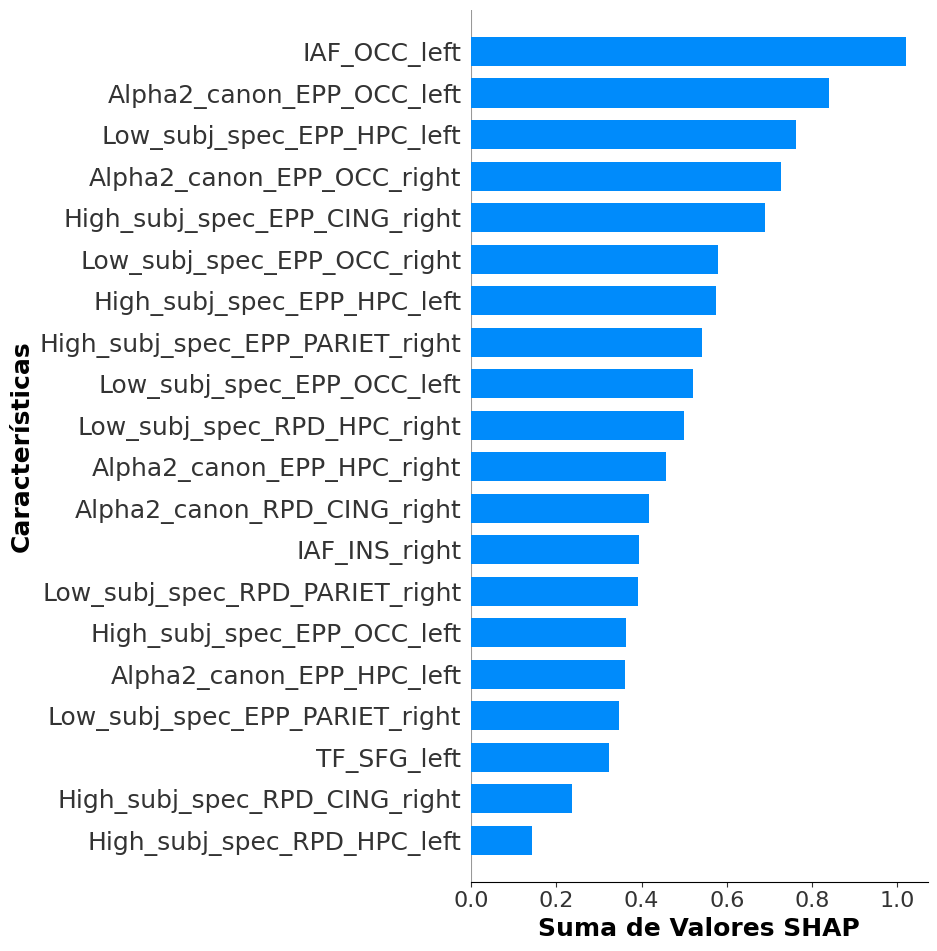

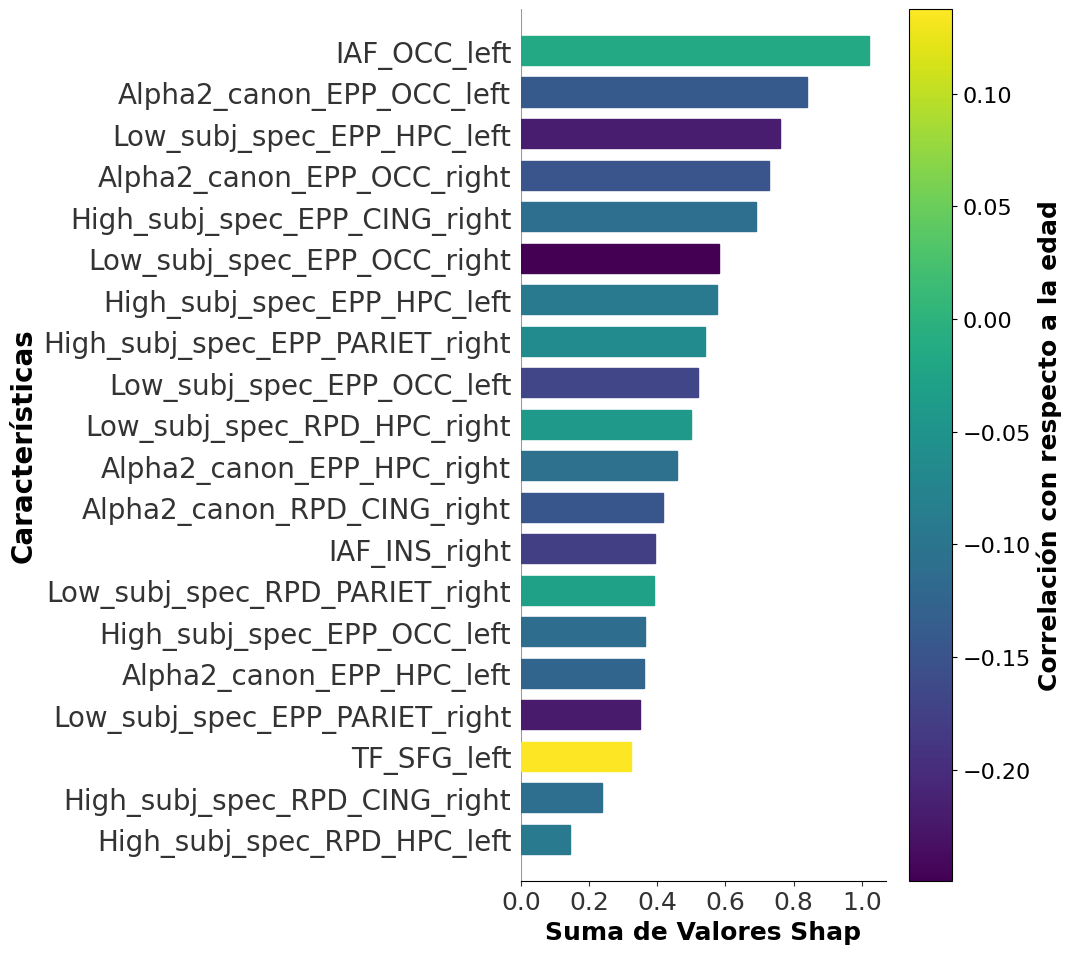

In [53]:
xgb_model.plot_feature_importance(shap_values=shap_values,X_test=X_test,y_test=xgb_model.y_test)

# 40 años todos los features 2

In [ ]:
opt_xgb_40A_2, best_params_xgb_40A_2 = xgb_model.search_best_model(n_iter_=100, n_jobs_=-2)


In [99]:
with open(f'{path}Opt_Model/opt_XGB_model_40A_2.pickle', 'wb') as file:
        pickle.dump(opt_xgb_40A_2, file)

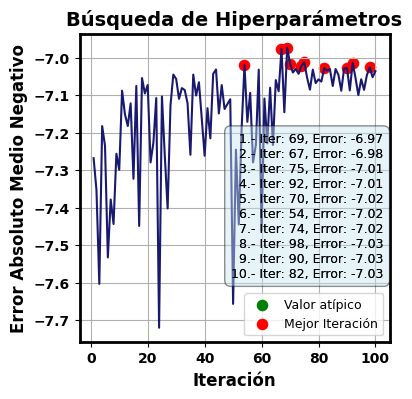

Top 1: Iteración 69, Error -6.973689792950948
Top 2: Iteración 67, Error -6.976654247840246
Top 3: Iteración 75, Error -7.012986801190254
Top 4: Iteración 92, Error -7.013698668541053
Top 5: Iteración 70, Error -7.016637120766518
Top 6: Iteración 54, Error -7.019376165010991
Top 7: Iteración 74, Error -7.0221357573607035
Top 8: Iteración 98, Error -7.026068362975733
Top 9: Iteración 90, Error -7.028281501134236
Top 10: Iteración 82, Error -7.028588516131426


In [92]:
xgb_model.plot_search_best_model(opt_xgb_40A_2, linewidth=1.5, color='midnightblue', num_max=100)

In [95]:
best_params_xgb_2 = xgb_model.best_hyper(opt_xgb_40A_2, num_max=100)

In [96]:
best_params_xgb_2

[{'colsample_bytree': 0.6,
  'learning_rate': 0.048216337810987164,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.057398128772235095,
  'max_depth': 9,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.04692252403831628,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.0442154444805867,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.04545200106964408,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.060688544551721776,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.04733620918000749,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.0530062125331622,
  'max_depth': 10,
  'n_estima

In [121]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 100,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": True
            }

In [113]:
xgb_model.fit_params_train = {}

In [ ]:
results, best_model_results, best_model = xgb_model.trainer(params_=best_params_xgb_2[0])

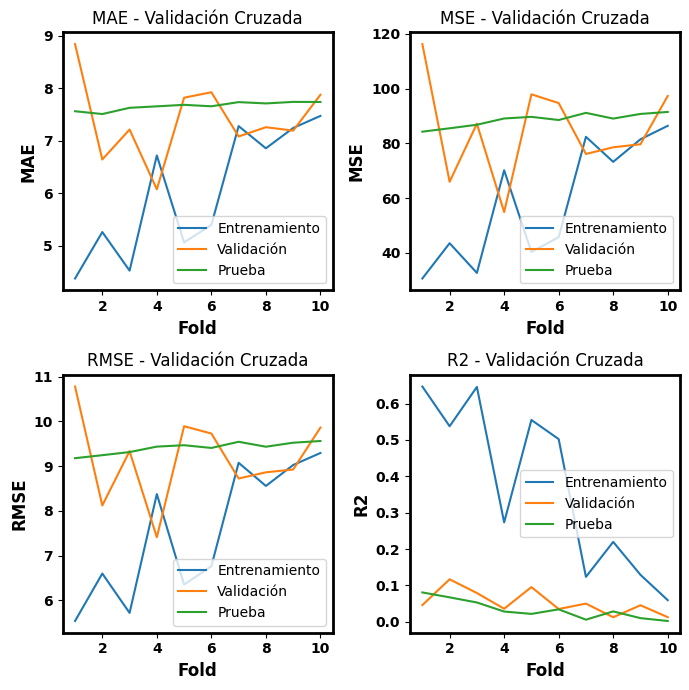

In [123]:
xgb_model.plot_metricas_evaluacion(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     5.337
Date:                Sat, 17 Aug 2024   Prob (F-statistic):             0.0222
Time:                        15:57:59   Log-Likelihood:                -242.48
No. Observations:                 162   AIC:                             489.0
Df Residuals:                     160   BIC:                             495.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.3804      0.584    108.545      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


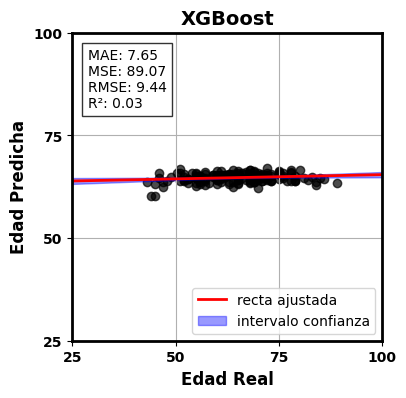

Error medio absoluto: 7.6536081887076435
Error cuadrático medio: 89.07040445660846
Raíz del error cuadrático medio: 9.437711823138512
Coeficiente de determinación (R²): 0.02806842271766019


In [120]:
y_pred=xgb_model.predicter(xgb_model.X_test)
xgb_model.plot_regresion(y=y_pred,x= xgb_model.y_test, x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     3086.
Date:                Sat, 17 Aug 2024   Prob (F-statistic):          5.16e-248
Time:                        15:55:40   Log-Likelihood:                -612.26
No. Observations:                 647   AIC:                             1229.
Df Residuals:                     645   BIC:                             1237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.4874      0.166    333.500      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


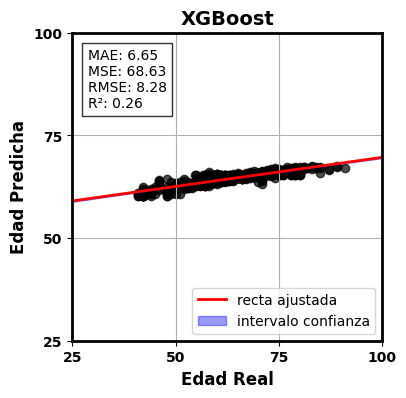

Error medio absoluto: 6.654149125741353
Error cuadrático medio: 68.6251354372418
Raíz del error cuadrático medio: 8.28402893749423
Coeficiente de determinación (R²): 0.2589691553340674


In [105]:
y_pred_train=xgb_model.predicter(xgb_model.X_train)
xgb_model.plot_regresion(y=y_pred_train,x= xgb_model.y_train, x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')